In [1]:
import matplotlib as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing the data

In [2]:
# Local dataset directory
data_dir = pathlib.Path(r'C:\Users\AARON\Desktop\A Folder\Aaron Imp Documents\Internship BharatXR\Work Assigned\NSFW Image Detection\Testing Images\Data_Graphic_Content')

In [3]:
print(data_dir)

C:\Users\AARON\Desktop\A Folder\Aaron Imp Documents\Internship BharatXR\Work Assigned\NSFW Image Detection\Testing Images\Data_Graphic_Content


C:\Users\AARON\Desktop\A Folder\Aaron Imp Documents\Internship BharatXR\Work Assigned\NSFW Image Detection\Testing Images\Data_Graphic_Content\Weapons\Automatic Rifle_81.jpeg


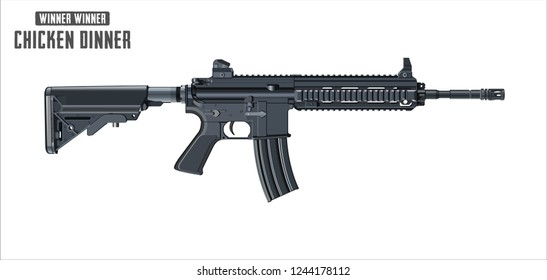

In [4]:
images = list(data_dir.glob('Weapons/*'))
print(images[69])
PIL.Image.open(str(images[69]))

In [5]:
img_height=180
img_width=180
batch_size=32
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 11468 files belonging to 5 classes.
Using 9175 files for training.


In [6]:
val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 11468 files belonging to 5 classes.
Using 2293 files for validation.


In [7]:
class_names=train_ds.class_names
print(class_names)

['Gore', 'NSFW_nudity', 'Normal', 'Violent', 'Weapons']


# Training the model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Define the input shape
input_shape = (180, 180, 3)
inputs = Input(shape=input_shape)

# Load the pre-trained ResNet50 model without the top layers
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_tensor=inputs,
    pooling='avg',
    weights='imagenet'
)

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the Flatten layer
x = Flatten()(pretrained_model.output)

# Add Dense layers
x = Dense(512, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)

# Create the new model
resnet_model = Model(inputs=inputs, outputs=outputs)

In [9]:
resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 180, 180, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 186, 186, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 90, 90, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 90, 90, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 90, 90, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 92, 92, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 45, 45, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 45, 45, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 45, 45, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 45, 45, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 45, 45, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 45, 45, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 45, 45, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 45, 45, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 45, 45, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
epochs=10
history= resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.8042 - loss: 0.7175 - val_accuracy: 0.9394 - val_loss: 0.1598
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.9486 - loss: 0.1363 - val_accuracy: 0.9581 - val_loss: 0.1256
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.9717 - loss: 0.0774 - val_accuracy: 0.9577 - val_loss: 0.1315
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.9862 - loss: 0.0426 - val_accuracy: 0.9498 - val_loss: 0.1585
Epoch 5/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.9885 - loss: 0.0362 - val_accuracy: 0.9459 - val_loss: 0.1737
Epoch 6/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9885 - loss: 0.0300 - val_accuracy: 0.9586 - val_loss: 0.1512
Epoch 7/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.9892 - loss: 0.0292 - val_accuracy: 0.9529 - val_loss: 0.1990
Epoch 8/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.9849 - loss: 0.0443 - val_accu

In [15]:
# Save the model
resnet_model.save('resnet_model.keras')

In [16]:
from tensorflow.keras.models import load_model

# Load the model
resnet_model = load_model('resnet_model.h5')

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(180, 180)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Path to your local image
img_path = r"C:\Users\AARON\Desktop\A Folder\Aaron Imp Documents\Internship BharatXR\Work Assigned\NSFW Image Detection\Testing Images\W.jpg"
# Load and preprocess the image
preprocessed_image = load_and_preprocess_image(img_path)

# Make a prediction
predictions = resnet_model.predict(preprocessed_image)

# Display the prediction
print("Predictions:", predictions)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# Get the predicted class label
predicted_class_label = class_names[predicted_class_index[0]]

# Display the predicted class label
print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predictions: [[3.4409499e-07 4.0007373e-05 1.9589141e-02 9.8004568e-01 3.2492328e-04]]
Predicted class: Violent
